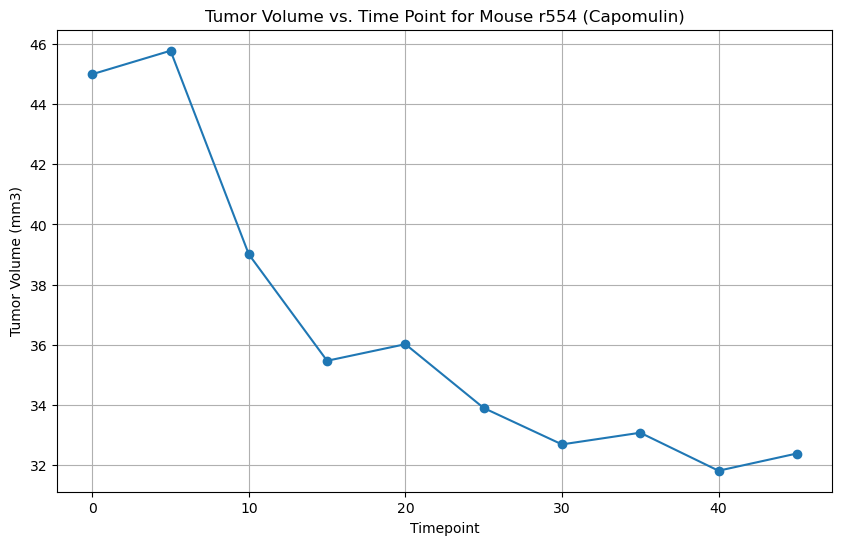

In [1]:
# Create a Line Plot for r554

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Selected mouse "r554" treated with Capomulin
mouse_id = "r554"

# Filter the data for only r554 treated with Capomulin
capomulin_data = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") & (combined_data["Mouse ID"] == mouse_id)]

# Generating line plot of tumor volume / time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker="o")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.grid(True)
plt.show()


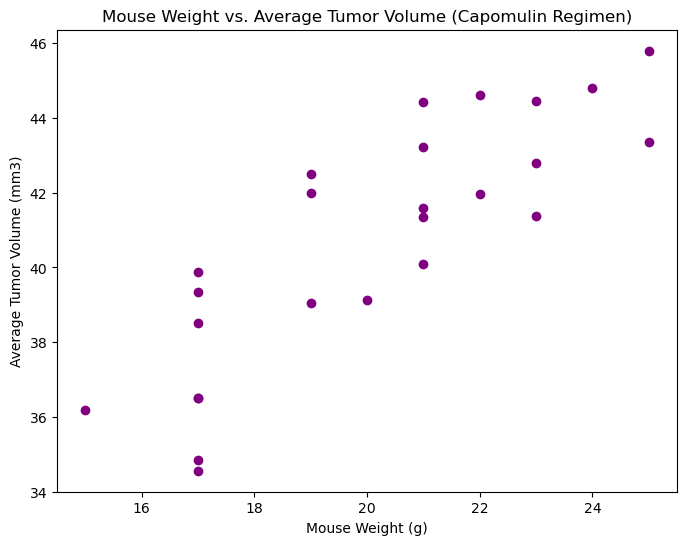

In [2]:
# Create a Scatter Plot for all Capomulin 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Filter data for Capomulin regimen
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# Calculate ave tumor volume for each mouse in Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Mouse weight for each mouse in the Capomulin regimen
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].unique().astype(float)

# Generate scatter plot of mouse weight / average observed tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker="o", facecolors="purple")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

plt.show()



Correlation Coefficient: 0.8419363424694722


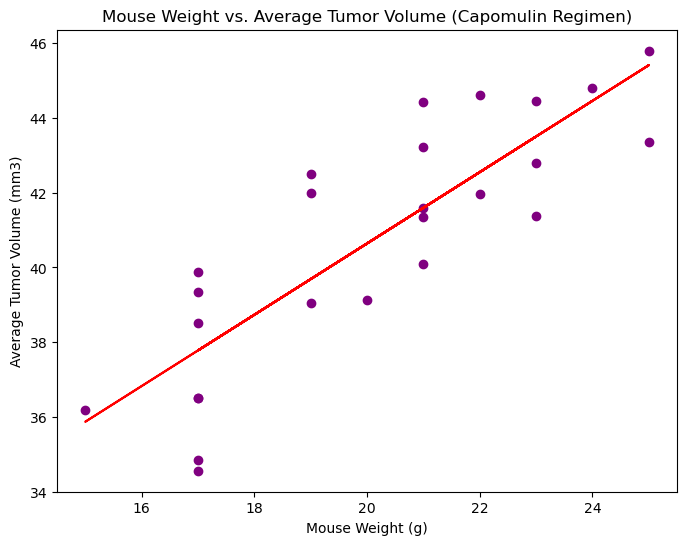

In [4]:
# Create a Scatter Plot for all Capomulin & linear regression model

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Filter data for Capomulin regimen
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# Calculate ave tumor volume for each mouse in Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Mouse weight for each mouse in the Capomulin regimen
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].unique().astype(float)

# Generate scatter plot of mouse weight / average observed tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker="o", facecolors="purple")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Calculate correlation coefficient
correlation = np.corrcoef(mouse_weight, average_tumor_volume)[0, 1]
print("Correlation Coefficient:", correlation)

# The linear regression model
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color="red", linestyle="-")

plt.show()